# Jupyter Data Science Workflow

Tutorial by Jake Vanderplas


In [35]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from urllib.request import urlretrieve
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [3]:
data = get_data()

In [4]:
data.head()

,East,West,Total
Date,,,
2019-03-31 23:00:00,6.0,10.0,16.0
2019-03-31 22:00:00,7.0,14.0,21.0
2019-03-31 21:00:00,18.0,15.0,33.0
2019-03-31 20:00:00,26.0,31.0,57.0
2019-03-31 19:00:00,30.0,58.0,88.0


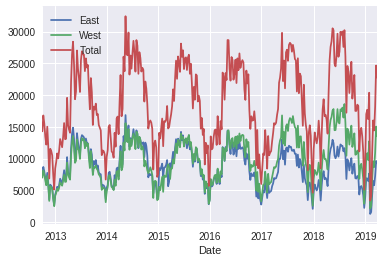

In [5]:
data.resample('W').sum().plot()

(0, 1100992.6)

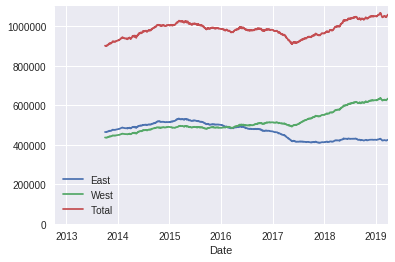

In [6]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

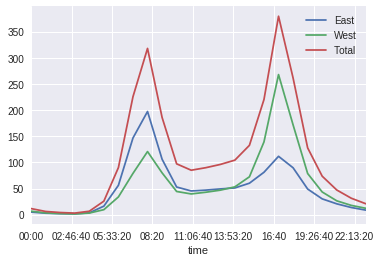

In [7]:
data.groupby(data.index.time).mean().plot()

In [8]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

In [9]:
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


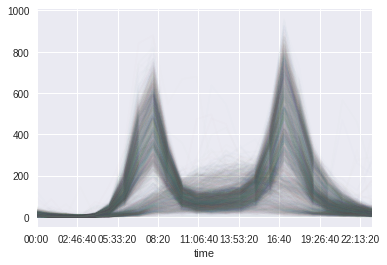

In [10]:
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [12]:
X = pivoted.fillna(0).T.values
X.shape

(2371, 24)

In [13]:
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [14]:
X2.shape

(2371, 2)

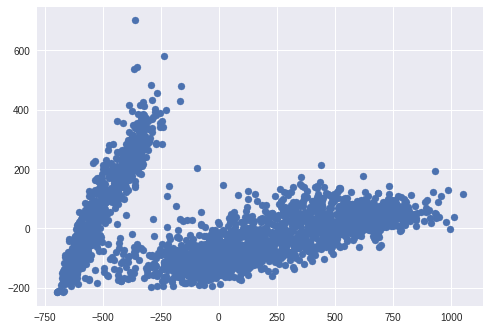

In [17]:
plt.scatter(X2[:, 0], X2[:, 1])

## Unsupervised Clustering

In [18]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 1, 1])

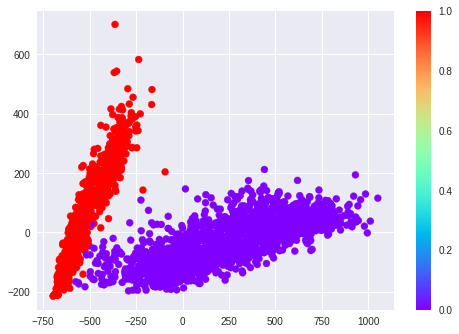

In [19]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

Text(0.5, 1.0, 'Red Cluster')

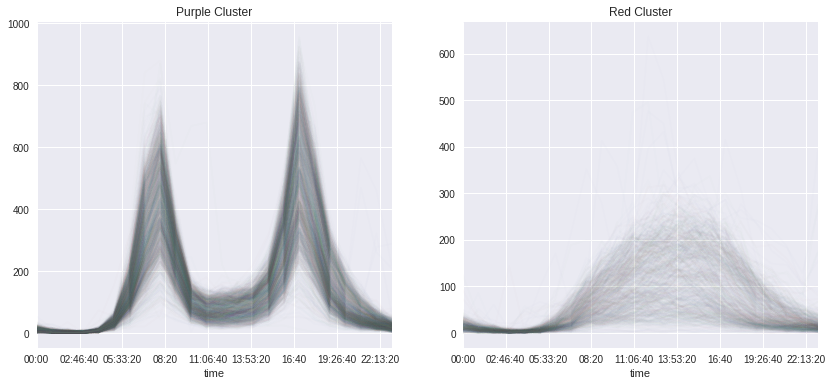

In [38]:
fig, ax = plt.subplots(1,2,figsize = (14,6))
pivoted.T[labels==0].T.plot(legend=False, alpha=0.01, ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False, alpha=0.01, ax=ax[1])

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')

## Comparing with Day of Week


In [29]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

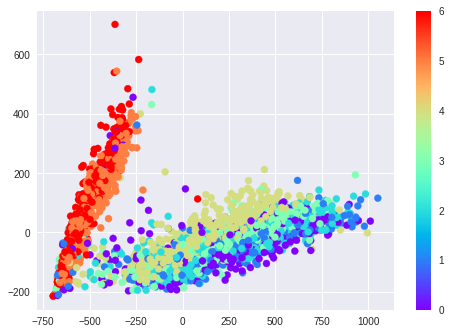

In [30]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliers
The following are weekdays with a holiday-like pattern

In [31]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels ==1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04', '2018-09-03',
               '2018-11-22', '2018-11-23', '2018-12-24', '2018-12-25',
      